# Učenje pod nadzorom - linearna regresija

<center><img src="Images/V2_banner.png" width="700" height="700"/></center>



**Učenje pod nadzorom** predstavlja vrstu problema u kojima postoji "vanjski učitelj", odnosno u podacima postoji utvrđena istina - oznaka koja je apsolutno točna. Sam zadatak je razviti model koji će temeljem ulaznih podataka naučiti predvitjeti oznake, odnosno uči relaciju $\mathbb{R}^n \rightarrow l; l \in [\mathbb{R}, \mathbb{N}]$. Iz navedene relacije vidi se da oznaka može biti *diskretna* ili *kontinuirana vrijednost*. Predviđanje kontinuirane vrijednosti (skup $\mathbb{R}$) naziva se regresijom.

U statistici, **linearna regresija** se odnosi na svaki pristup modeliranju relacija između jedne ili više varijabli označene s Y, te jedne ili više varijabli označene s X, tako da takav model linearno ovisi o nepoznatim parametrima estimiranih iz podataka. [(Za više informacija)](https://hr.wikipedia.org/wiki/Linearna_regresija). Drugim riječima, potrebno je pronaći one parametre pomoću koji se linearno može modificirati odnos varijable X i varijable Y.

---

## Segmenti učenja pod nadzorom

U učenju pod nadzorom postoji nekoliko temeljnih segmenata koji su zajednički bilo kojem promatranom problemu ove klase:


1. **Ulazni podaci** - Razumijevanje ulaznih podataka i njihovo pretprocesiranje jedan je od najbitnijih koraka. Razviti dobar model bez prethodnog poznavanja ulaznih podataka je gotovo nemoguć izazov. Stoga domensko znanje i interdisciplinarnost jesu karakteristike koje se često vežu uz istraživače ovog područja.

2. **Odabir modela** - Odabir dobrog modela, odnosno algoritma pa potom hiperparametara odabranog algoritma iziskuje puno iskustva i često je proces "pokušaja i pogodaka". Danas jedan najčešćih modela strojnog učenja jesu *neuronske mreže*.

3. **Funkcija cilja** - Kako bi mogli mjeriti koliko neki model dobro opisuje/savladava zadani problem, potrebno je osmisliti funkciju koja će na neki način validirati-bodovati dani model. U tu svrhu kreirana je funkcija cilja koja se u konačnici i optimizira.

4. **Optimizacija modela** - Nakon odabranog modela i funkcije cilja, potrebno ga je optimizirati, odnosno prilagoditi ga da što bolje savladava prethodno zadani problem. U optimizaciji modela nastoji se model i njegove parametre prilagoditi na takav način da što bolje opisuju zadani problem, odnosno da funkcija cilja za dani model i njegove hiperparametre bude minimala/maksimalna. 

---

## Ulazni podaci

Prvi korak jest razumjeti ulazne podatke. U datoteci *"ledoSladoledi.txt"* nalaze se podaci o populaciji ljudi u određenom mjestu i profitu kojeg je to mjesto ostvarilo. U prvom stupcu su podaci vezani za populaciju ljudi, dok je u drugom stupcu profit (negativni predznak označava gubitak). Za početak potrebno ih je učitati i prikazati na grafu kako bi čim lakše odabrali adekvatni model.

---

<font color='green'>
    
## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Pokrenite idući programski kod koji će iscrtati podatke iz datoteke "ledoSladoledi.txt".

/home/franko/Desktop/Nastava2025_2026/StrojnoUčenje/SDSR-StrojnoUcenje/Notebooks/Skripte/Vjezba2


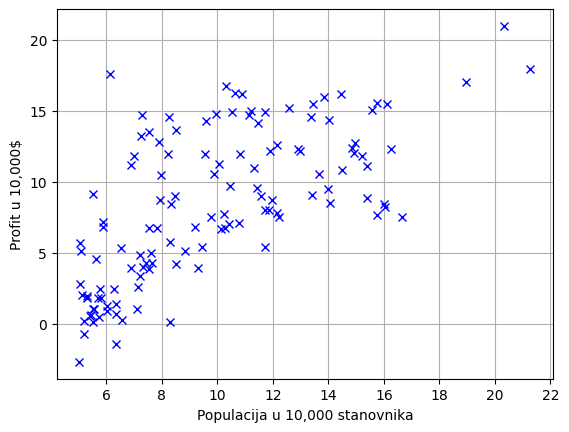

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2
    
# Programske knjižice
from Skripte.Vjezba2.inspekcija_podataka import plot_data
# Funkcija za crtanje
plot_data()

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti *Skripte.Vjezba2.inspekcija_podataka* implementirajte funkciju **inspect_data** koja će statistički opisati podatke tako da pronađe i ispiše sve što bi Vam moglo pomoći u dizajnu i odabiru modela poput srednje vrijednosti, percentila, minimalne i maksimalne vrijednosti te standardne devijacije. Razmislite što svaka od tih metrika predstavlja i na koja pitanja odgovara. 

U novije vrijeme, ovaj postupak naziva se stvaranjem otiska prsta skupa podataka odnosno *engl.* **dataset fingerprint**.

In [3]:
# Programske knjižice
from Skripte.Vjezba2.inspekcija_podataka import inspect_data

# Funkcija za crtanje
inspect_data()

---

## Odabir modela

Budući da je tema ove vježbe **linearna regresija**, kao model će se koristiti linearna funkcija, odnosno pravac, čija jednadžba glasi:

\begin{equation}
f(x) = y = \theta_1 \cdot x + \theta_0 
\end{equation}



<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Idući programski kod iscrtava pravac, mijenjate parametre $\theta_0$ i $\theta_1$ te pokušajte pronaći pravac koji najbolje opisuje dane podatke. Iznesite svoja opažanja, odnosno kako procijenjujete koliko vaš pravac dobro opisuje podatke?

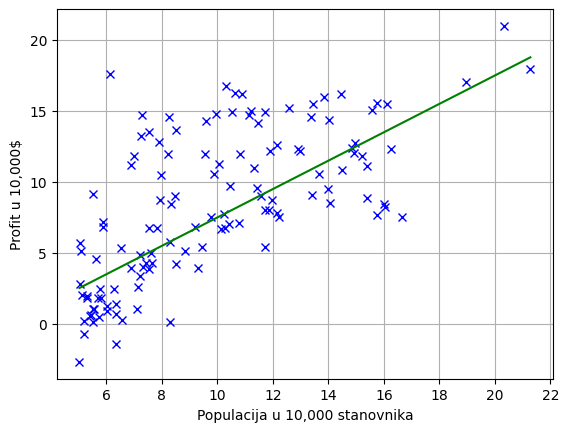

In [12]:
# Programske knjižice
from Skripte.Vjezba2.inspekcija_podataka import draw_linear

# Funkcija za crtanje
draw_linear(theta0 = -2.5,
           theta1 = 1)

---

## Funkcija cilja

U evaluaciji regresije tipično se koristi nekoliko funkcija cilja, odnosno kriterija putem kojih se modeli mogu evaluairati. Neke od najčešćih su redom:

1. MSE — Mean Squared Error (Srednja kvadratna pogreška)
\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

- Najčešće korištena metrika za regresiju.

- Kažnjava velike greške više zbog kvadriranja (osetljiv na outliere.).

---

2. RMSE — Root Mean Squared Error (Korjen srednje kvadratne pogreške)

\begin{equation}
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
\end{equation}

- Ima istu jedinicu kao ciljana vrednost.
 
- Intuitivnija interpretacija od MSE.

---
3. MAE — Mean Absolute Error (Srednja apsolutna greška)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

- Manje osjetljiva na outliere.

- Ravnomjernije kažnjava greške.

---
4. $R^{2}$ — Coefficient of Determination (Koeficijent determinacije)

\begin{equation}
R^2 = 1 - \frac{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }{ \sum_{i=1}^{n} (y_i - \bar{y})^2 }
\end{equation}

- $R^{2}=1$: Model savršeno objašnjava sve promjene u zavisnoj varijabli, što je rijetko u stvarnom svijetu. 

- $R^{2}=0$: Model uopće ne objašnjava promjenljivost zavisne varijable. 

- Vrijednosti između 0 i 1: Većina modela ima vrijednost $R^{2}$ negdje u tom rasponu. Viša vrijednost znači da model bolje pristaje podacima.

- Negativna vrijednost: model je lošiji od predikcije srednje vrijednosti za svaki dani podatak.

---

U danom problemu mjeri se udaljenost stvarne vrijednosti profita za svaki grad od vrijednosti profita koju za taj isti grad predviđa izračunati pravac (model). Navedene metrike su implementirane u knjižici **sklearn**.

---

<font color='zadatak'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti *Skripte.Vjezba2.inspekcija_podataka* implementirajte prethodno navedene metrike u funkciji **evaluate_metrics** te mijenajući parametre $\theta_0$ i $\theta_1$ proučite kako se mijenjaju metrike. Provjerite jesu li prethodno odabrane vrijednosti $\theta_0$ i $\theta_1$ uistinu najbolje.

MSE:  98.3881
RMSE: 9.9191
MAE:  8.4707
R²:   -2.5211


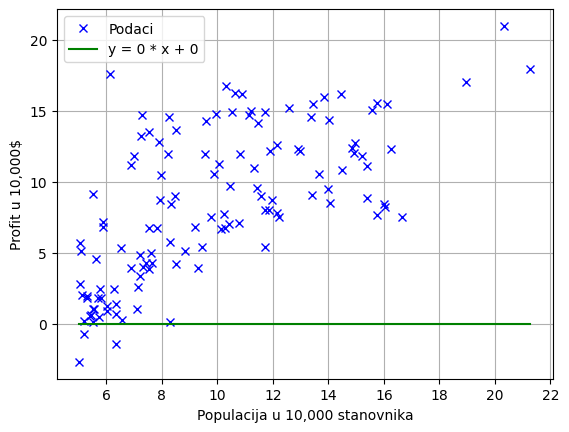

In [14]:
# Programske knjižice
from Skripte.Vjezba2.inspekcija_podataka import evaluate_metrics

# Funkcija za crtanje
evaluate_metrics(theta0 = 0,
                 theta1 = 0)

---

## Optimizacija modela

Optimizirati model u ovom slučaju znači pronaći pravac koji najbolje opisuje dane podatke. Prvi pokušaj optimiziranja može biti čisti **grid search** algoritam ([poveznica](https://www.dremio.com/wiki/grid-search/)). Ideja samog algoritma je sistematski testirati ovistnost funkcije cilja o vrijednosti parametara $\theta_0$ i $\theta_1$.

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti *Skripte.Vjezba2.inspekcija_podataka* implementirajte prethodno navedene metrike u funkciji **grid_search**. Potrebno je stvoriti kombinacije parametara $\theta_0$ i $\theta_1$ i za njih izračunati score - odnosno cijenu. Završni produkt modificiranog programskog koda moraju biti tripleti ($\theta_0$, $\theta_1$ i $cijena$) koji su pohranjeni u tri vektora sa odgovarajućim indeksima (*_xs*, *_ys* i *score*).

Protumačite dobiveni prostor cijena i odgovorite na pitanja: 

* Kako pronaći optimalno rješenje?
* Mora li se za svaki problem tražiti optimalno rješenje?

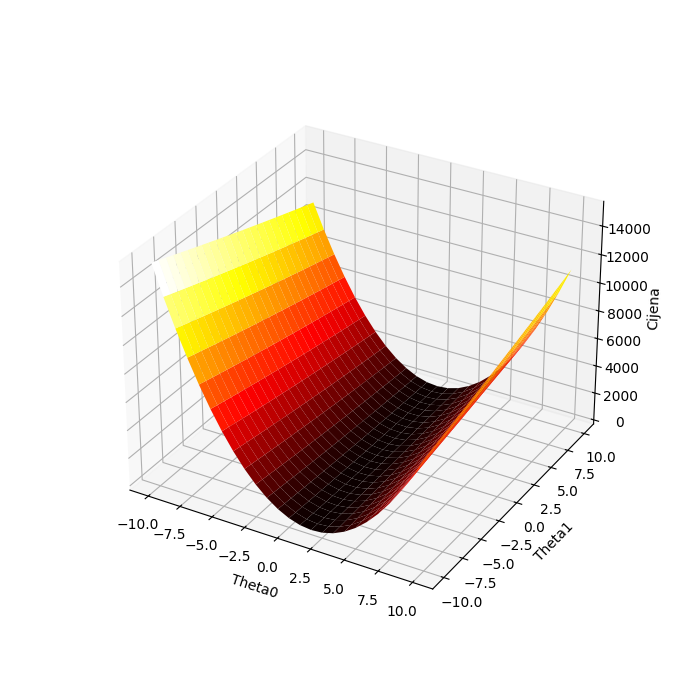

In [2]:
# Programske knjižice
from Skripte.Vjezba2.inspekcija_podataka import grid_search
%matplotlib widget
# Funkcija 
grid_search()

---

## Pronalazak optimalnog rješenja linearne funkcije

Budući da je problem pravca odnosno linearni problem poprilično jednostavan problem, možemo ga riješiti i **analitički** i **numerički**.

Oba pristupa problemu zahtijevaju poznavanje derivacije i funkcije cilja, u promatranom slučaju **Srednje kvadratne pogreške** (*engl. Mean Squared Error MSE*). Prije svega prisjetimose derivacije:


* Derivacija opisuje brzinu promjene funkcije u odnosu na promjenu nezavisne varijable (argumenta funkcije). Deriviranjem funkcije dobije se druga funkcija istih argumenata. Za pojedinu vrijednost nezavisne varijable (derivacija u točki), derivacija je u toj točki jednaka 1 ako funkcija raste (povećava se vrijednost funkcije) jednako brzo kao i nezavisna varijabla; ako funkcija raste brže/sporije, derivacija je veća/manja od 1, te jednaka nuli ako se funkcija ne mijenja. Simetrično, ako funkcija pada (umanjuje se vrijednost funkcije dok argument raste), derivacija je negativna. Za neke funkcije derivacija ne postoji u nekim (ili u svim) točkama. Ako derivacija postoji, kaže se da je funkcija derivabilna u tim točkama ili u tome dijelu svoje domene.([Izvor](https://hr.wikipedia.org/wiki/Derivacija))


* JEDNOSTAVNIJE: Derivacija kaže ako imamo funkciju koja ovisi o nekoliko parametara, kako promjena svakog parametara utječe na vrijednost funkcije. Primjerice ako u nekom kulinarskom natjecanju žiri ocjenjuje tortu. Svaka torta ima svoj recept koji kaže koliko koje namjernice ide u tu tortu. Nas zanima ako u receptu za tortu umjesto propisanih 50 dag čokolade stavimo 75 dag čokolade, kako će se promijeniti ocjena žirija.([Izvor](http://www.riteh.uniri.hr/osoba/franko-hrzic))

## Analitičko rješenje
<font color='green'>
    
## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Dakle ako se uzme funkcija cilja i dani model pravca:

$ MSE = \frac{\sum_{i = 0}^{n}(y_i - \hat{y}_i)^2}{n} $

$ \hat{y}_i = \theta_0 + \theta_1 x_i $

deriviranjem funkcije cilja po svakom parametru modela $y$ dobit će se matematički opis kako svaki od parametara $\theta$ utječe  na funkciju cilja.

---

Budući da se u zadataku traži pravac koji najbolje opisuje podatke, matematički se može izraziti traženje minimuma funkcije cilja po odabranim parametrima (vidljivo iz Promatranjem generiranog prostora ovisnosti cijene o parametrima):

1. $\frac{MSE}{\delta\theta_0} = 0$ 

2. $\frac{MSE}{\delta\theta_1} = 0$


1. $\frac{\delta (\sum_{i=1}^n (y_i - f(x_i, \theta_0, \theta_1))^2}{\delta\theta_0} = 0$

2. $\frac{\delta (\sum_{i=1}^n (y_i - f(x_i, \theta_0, \theta_1))^2}{\delta\theta_1} = 0$

---

Raspisom, odnosno deriviranjem funkcija:

1. $\sum_{i = 1}^n 2 \cdot (y_i - f(x_i, \theta_0, \theta_1))\cdot \frac{-\delta f(x_i, \theta_0, \theta_1)}{\delta \theta_0} = 0$

2. $\sum_{i = 1}^n 2 \cdot (y_i - f(x_i, \theta_0, \theta_1))\cdot \frac{-\delta f(x_i, \theta_0, \theta_1)}{\delta \theta_1} = 0$

Izlučivanjem konstanti dobivamo sljedeće funkcije:

1. $\sum_{i = 1}^n (y_i - f(x_i, \theta_0, \theta_1))\cdot \frac{\delta f(x_i, \theta_0, \theta_1)}{\delta \theta_0} = 0$

2. $\sum_{i = 1}^n (y_i - f(x_i, \theta_0, \theta_1))\cdot \frac{\delta f(x_i, \theta_0, \theta_1)}{\delta \theta_1} = 0$

Izračun parcijalnih derivacija jest sljedeći:

1. $\delta \frac{f(x_i, \theta_0, \theta_1)}{\delta \theta_0} = \frac{\delta (\theta_0 + \theta_1 x)}{\theta_0} = 1$

2. $\delta \frac{f(x_i, \theta_0, \theta_1)}{\delta \theta_1} = \frac{\delta (\theta_0 + \theta_1 x)}{\theta_1} = x_i$

---

Uvrštavanjem prethodno izračunatih derivacija dobivaju se sljedeći izrazi:

1. $\sum_{i = 1}^n (y_i - \theta_0 - \theta_1 x_1) = 0$

2. $\sum_{i = 1}^n (y_i - \theta_0 - \theta_1 x_1)\cdot x_1 = 0$

---

Raspisivanjem sustava prethodno napisanih jednadžbi one postaju sljedeći izrazi:

1. $(\sum_{i=1}^n x_i)\cdot \theta_1 + n\cdot \theta_0 = \sum_{i=1}^n y_i$

2. $(\sum_{i = 1}^n x_{i}^2)\cdot \theta_1 + (\sum_{i=1}^n x_i)\cdot \theta_0 = \sum_{i=1}^n x_i\cdot y_i $

---

U posljednjem koraku možemo formalizirati ispis na sljedeći način:

$\theta_0 = \frac{\sum x_{i}^2 \sum y_i - \sum x_i \sum x_i y_i}{n \sum x_{i}^2 - (\sum x_i)^2} $

$\theta_1 = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_{i}^2 - (\sum x_i)^2}$

---


<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Koristeći prethodne izvode za dane točke: $(0,2), (1,3), (2,5), (3,4), (4,6)$ Odredite:

* Jednadžbu regresijskog pravca
* Procijenjenu vrijednost kada je x = 10
    

---

<span style="color:red; font-size: 18pt"> **Rješenje!**</span>


Koristimo izvedene formule:

1. $(\sum_{i=1}^n x_i)\cdot \theta_1 + n\cdot \theta_0 = \sum_{i=1}^n y_i$

2. $(\sum_{i = 1}^n x_{i}^2)\cdot \theta_1 + (\sum_{i=1}^n x_i)\cdot \theta_0 = \sum_{i=1}^n x_i\cdot y_i $

Potrebno je izračunati sume:

|            |    |   |   |    |     | $\sum$ |
|:---------:|:-:|:-:|:--:|:--:|:--:|:------:|
|   $x_i$   | 0 | 1 |  2 |  3 |  4 |   10   |
|   $y_i$   | 2 | 3 |  5 |  4 |  6 |   20   |
| $x_{i}^2$ | 0 | 1 |  4 |  9 | 16 |   30   |
| $x_{i}y_i$ | 0 | 3 | 10 | 12 | 24 |   49   |

---

Uvrštavanjem u formule dobivamo sljedeće izraze

1. $ 10 \theta_1 + 5 \theta_0 = 20 $

2. $ 30 \theta_1 + 10 \theta_0 = 49$

---

Rješenje sustava je:

$\theta_0 = 2.2$ , $\theta_1 = 0.9$

$y = 0.9x + 2.2$

---

Za x = 10:

$ y = 0.9 * 10 + 2.2 = 11.2$

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Koristite sljedeći generator zadataka kako bi izvježbali analitičko računanje rješenja linearne regresije.

In [3]:
# Programske knjižice
from Skripte.Vjezba2.generator_zadataka import generator
%matplotlib widget
# Funkcija 
generator()

---

## Numeričko rješenje

Analitičko rješenje je praktično, ali samo za mali broj parametara. Ako je model složen, izračun parcijalnih derivacija postaje suviše zahtjevan. U tu svrhu razvilo se **numeričko rješenje**.

Inspekcijom funkcije cilja i njenom korelacijom s različitim vrijednostima parametra $\theta$, može se uočiti jedno bitno svojstvo, a to je **konveksnost funkcije**, odnosno da postoji cijeli niz kombinacija parametara $\theta_0$ i $\theta_1$ koji postižu minimum funkcije koji je ujedno i globalni minimum funkcije. Ako krenemo od nasumičnog odabira parametara $\theta_0$ i $\theta_1$ dok god se krećemo "nizbrdo" po funkciji cilja dolazimo do vrijednosti parametara koji postižu minimum funkcije cilja. Jedan od načina kretanja "nizbrdo" jest **gradijentni spust**. 

**Gradijentni spust** *(engl. Gradient descent)* je generički optimizacijski algoritam koji je u stanju pronaći optimalna rješenja za veliki broj problema u kojima se funkcija cilja može dervirati po svojim ulaznim parametrima. Temeljna ideja gradijentnog spusta jest iterativnim postupkom mijenjati parametre s ciljem minimiziranja (ili maksimiziranja) funkcije cijene.

Pojednostavljena ideja iza gradijentnog spusta leži u činjenici da funkciju cijene možemo skicirati kao "brda i doline" gdje tražimo najnižu moguću točku u koju možemo doći iz trenutne pozicije. Primjer funkcije cijene srednje kvadratne pogreške za linearnu regresiju može se vidjeti na sljedećoj slici:

<center><img src="Images/V2_gradient.png" width="500" height="500"/></center>


Na samom početku nasumično se odrede vrijednosti parametra $\Theta$ *(engl. random initialization)* po kojem je funkcija cijene parametrizirana. U svakoj od sljedećih iteracija mijenja se parametar $\Theta$ na takav način da se vrijednosti ažuriraju niz gradijent (prva derivacija funkcije cijene). Drugim riječima, izračun gradijenta predstavlja smjer u kojem se nalazi "bolje" rješenje od onog trenutnog. Kako bi se odredila veličina "koraka" u smjeru ka boljem rješenju, uvodi se hiperparametar stope učenja $\alpha$ *(engl. learning rate)*.

Određivanje stope učenja $\alpha$ u izvornom algoritmu gradijentnog spusta provodi se empirijski (tako da postoji iskustvo na sličnom problemu), ili eksperimentalno koristeći metodu poput Grid-Search algoritma. Također neka poboljšanja gradijentnog spusta sadrže u sebi metodu kojom adaptiraju (mijenjaju) stopu učenja u ovisnosti o duljini treniranja, ili postoji *scheduler* koji postavlja stopu učenja prema nekom od prethodno definiranih pravila.

---

#### Matematička formulacija Gradijentnog spusta

Dakle, gradient descent je iterativni optimizacijski algoritam prvog stupnja koji u svakoj iteraciji čini korak proporcionalan negativu gradijenta (ili procjene gradijenta) funkcije cilja u trenutnoj točki.

Formula po kojoj se gradijentni spust računa jest:

$$\Theta_{n+1} = \Theta_n - \alpha\cdot\bigtriangledown_\Theta J(\Theta) $$

Parametar koji se mora zadati kada se koristi gradijentni spust jest:

* $\alpha$ - stopa učenja (engl. learning rate) koji kaže za koliko se prilikom svakog koraka ažuriraju parametri

---

Ovom intuicijom može se za proizvoljno odabrane  parametre $\theta_0$ i $\theta_1$ izračunati gradijent-promjena funkcije cilja. Gradijent će pokazati u kojem smjeru je "nizbrdo", odnosno dati će nagib funkcije u danoj točki, ali neće reći za koliko se potrebno pomaknuti u tom smjeru. U tu svrhu uvodi se parametar **stope učenja** $\alpha$. Navedeno se matematički može izreći na sljedeći način:

Funkcija cilja glasi:

$ MSE = \frac{\sum_{i = 0}^{n}(y_i - \hat{y}_i)^2}{2n} $ - dodajemo 2 u nazivnik zbog lakšeg deriviranja.

Funkcija $\hat{y}$ glasi:

$\hat{y} = \theta_1 \cdot x + \theta_0 = \theta^T x$ - ako svakom $x$-u pridružimo još broj 1 ($x = [1, x]$).

---

Gradijent se izračunava tako što se derivira funkciju cilja po parametrima $\theta_0$ i $\theta_1$:

$\frac{\delta(J)}{\delta \theta_0} = \frac{1}{n} \cdot \sum_{i=0}^{n}(y_i - \hat{y}_i)\cdot1$

$\frac{\delta(J)}{\delta \theta_1} = \frac{1}{n} \cdot \sum_{i=0}^{n}(y_i - \hat{y}_i)\cdot x_i$

---

Odnosno:

$\frac{\delta(J)}{\delta \theta} = \frac{1}{n} \cdot \sum_{i=0}^{n}(y_i - \hat{y}_i)\cdot x_i$ -uz prethodno navedenu promjenu $x$-a

A jedan korak gradijentnog spusta glasi:
$\theta_{j+1} = \theta_j - \alpha \cdot \frac{1}{n} \cdot \sum_{i=0}^{n}(y_i - \hat{y}_i)\cdot x_i$

---


<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>


Sljedeći programski kod omogućuje mijenjanje sljedećih vrijednosti:

* broj iteracija.
* stopu učenja $\alpha$
* inicijalne vrijednost parametara $\theta_0$ i $\theta_1$

Mijenjajte parametre $\alpha$, $\text{brojIteracija}$ i inicijalni $\theta$. Proučite i iznesite zaključke kako parametri utječu na konvergenciju gradijentnog spusta. Što se dešava kada je parametar $\alpha$ premali, a što kada je prevelik?


In [1]:
# Programske knjižice
from Skripte.Vjezba2.gradient_descent import plot_interactive
%matplotlib widget
# Funkcija 
plot_interactive()

/home/franko/Desktop/Nastava2025_2026/StrojnoUčenje/SDSR-StrojnoUcenje/Notebooks/Skripte/Vjezba2


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='theta0', max=10.0, min=-10.…

<function Skripte.Vjezba2.gradient_descent.plot_interactive.<locals>._funkcijaMSE(theta0=0.0, theta1=0.0, alpha=0.1, brojIteracija=10)>

---
---

## PyTorch implementacija

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

PyTorch implemetnacija se sastoji od nekoliko ključnih komponenti:

1.) Učitavač podataka (**Dataloader**)

2.) **Model**

3.) Trening subrutine

4.) Validacijske subrutine

Za sljedeće vježbe, pokušajte samostalno implementirati linearnu regresiju pomoću PyTorch-a.